In [0]:
!ls

sample_data  test.csv  train.csv


In [0]:
!rm train.csv

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


# Hackathon

In [0]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Set the optional settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [0]:
# Extra libraries
## from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

## Step 1: Load and Understand the Data

In [0]:
# Import the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
# Remove the reservation_id from the train and save that of the test
train.drop('reservation_id', axis=1, inplace=True)
reservation_id = test.pop('reservation_id')

In [0]:
# Look at the shape of the dataset
print('Train: ', train.shape)
print('Test: ', test.shape)

Train:  (341424, 23)
Test:  (146765, 22)


In [0]:
# Look at the head of train
train.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [0]:
# Look at the head of test
test.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id
0,05/04/18,05/04/18,06/04/18,3,2,2,0,45,3,3,4,1,2.0,2.0,3,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,A,C,9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739...
1,24/05/15,23/06/15,27/06/15,1,2,4,0,45,1,1,4,8,2.0,2.0,4,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e7f6c011776e8db7cd330b54174fd76f7d0216b612387a...
2,21/07/15,07/08/15,10/08/15,3,2,3,0,45,2,2,2,3,4.0,2.0,2,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...
3,31/07/15,22/10/15,25/10/15,1,2,3,0,45,1,1,2,3,2.0,2.0,6,3,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,49d180ecf56132819571bf39d9b7b342522a2ac6d23c14...
4,01/07/16,01/10/16,05/10/16,1,2,4,0,45,1,2,3,8,2.0,2.0,11,2,H,1,2114944930dcc42ce5b9b50ae965cf8a9c04e46be63d84...,F,A,e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027...


In [0]:
# Look at the info of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 23 columns):
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  336660 non-null float64
state_code_resort                     3414

In [0]:
# Look at the missing values in the train set
print((100 * train.isnull().sum() / train.shape[0] ).sort_values(ascending=False))

state_code_residence                  1.395332
season_holidayed_code                 0.033390
amount_spent_per_room_night_scaled    0.000000
resort_type_code                      0.000000
checkin_date                          0.000000
checkout_date                         0.000000
channel_code                          0.000000
main_product_code                     0.000000
numberofadults                        0.000000
numberofchildren                      0.000000
persontravellingid                    0.000000
resort_region_code                    0.000000
roomnights                            0.000000
room_type_booked_code                 0.000000
resort_id                             0.000000
state_code_resort                     0.000000
total_pax                             0.000000
member_age_buckets                    0.000000
booking_type_code                     0.000000
memberid                              0.000000
cluster_code                          0.000000
reservationst

In [0]:
# Look at the missing values in the test set
print((100 * test.isnull().sum() / test.shape[0] ).sort_values(ascending=False))

state_code_residence        1.539877
season_holidayed_code       0.023848
resort_id                   0.000000
resort_type_code            0.000000
checkin_date                0.000000
checkout_date               0.000000
channel_code                0.000000
main_product_code           0.000000
numberofadults              0.000000
numberofchildren            0.000000
persontravellingid          0.000000
resort_region_code          0.000000
room_type_booked_code       0.000000
reservationstatusid_code    0.000000
roomnights                  0.000000
state_code_resort           0.000000
total_pax                   0.000000
member_age_buckets          0.000000
booking_type_code           0.000000
memberid                    0.000000
cluster_code                0.000000
booking_date                0.000000
dtype: float64


In [0]:
# Check the count of missing values in the two columns
print('Train - state_code_residence: ', train.state_code_residence.isnull().sum())
print('Test - state_code_residence: ', test.state_code_residence.isnull().sum())
print()
print('Train - season_holidayed_code: ', train.season_holidayed_code.isnull().sum())
print('Test - season_holidayed_code: ', test.season_holidayed_code.isnull().sum())

Train - state_code_residence:  4764
Test - state_code_residence:  2260

Train - season_holidayed_code:  114
Test - season_holidayed_code:  35


## Step 2: Visualization

### 2.1. Univariate Unordered Categorical

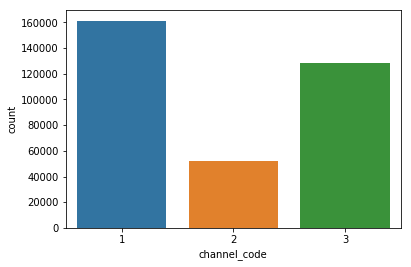

In [0]:
# Channel_code
sns.countplot(train.channel_code)

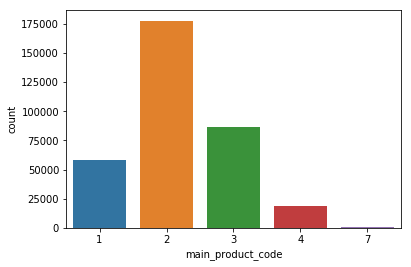

In [0]:
# main_product_code
sns.countplot(train.main_product_code)

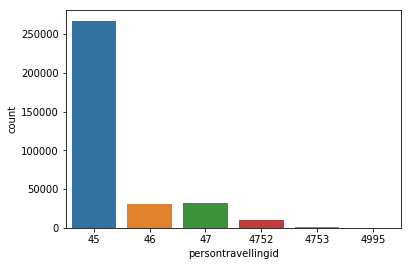

In [0]:
# persontravellingid
sns.countplot(train.persontravellingid)

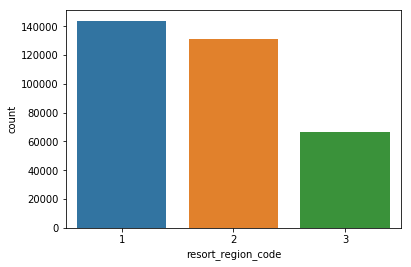

In [0]:
# resort_region_code
sns.countplot(train.resort_region_code)

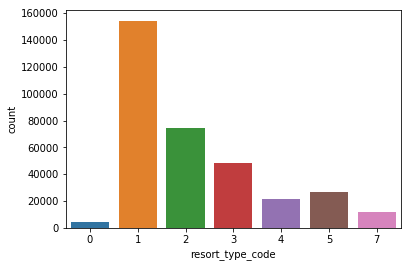

In [0]:
# resort_type_code
sns.countplot(train.resort_type_code)

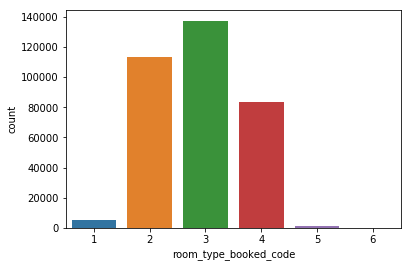

In [0]:
# room_type_booked_code
sns.countplot(train.room_type_booked_code)

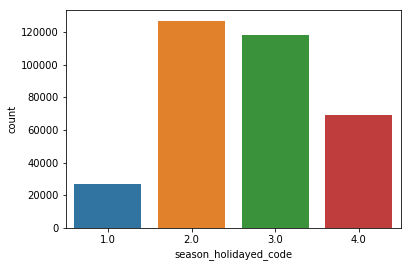

In [0]:
# season_holidayed_code
sns.countplot(train.season_holidayed_code)

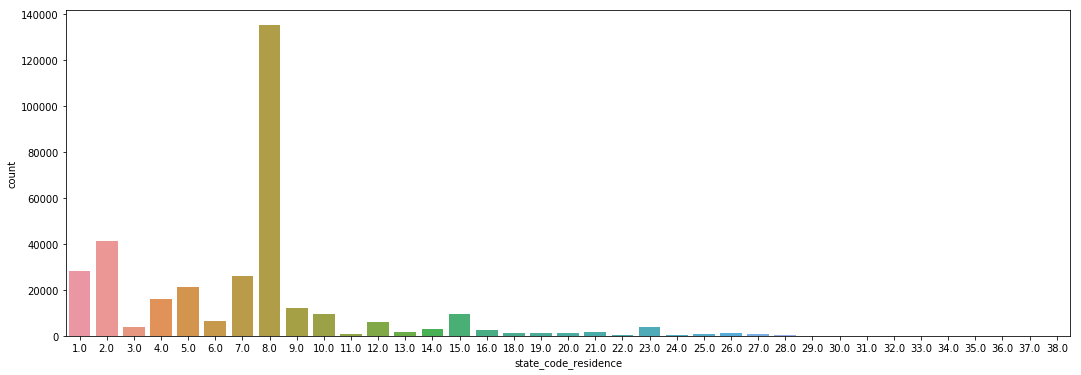

In [0]:
# state_code_residence
figure = plt.figure(figsize=(18,6))
sns.countplot(train.state_code_residence)

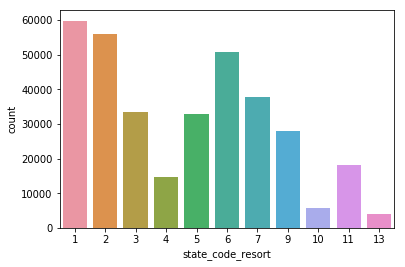

In [0]:
# state_code_resort
sns.countplot(train.state_code_resort)

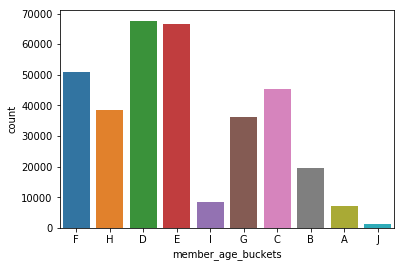

In [0]:
# member_age_buckets
sns.countplot(train.member_age_buckets)

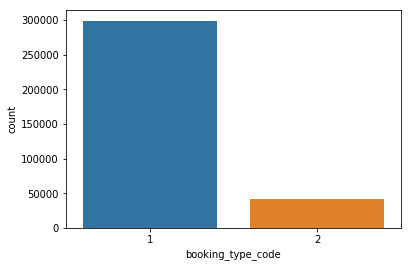

In [0]:
# booking_type_code
sns.countplot(train.booking_type_code)

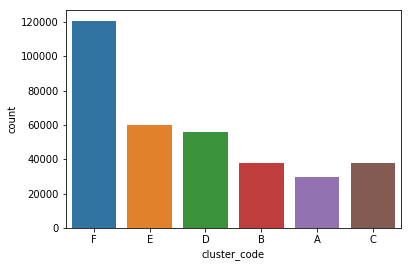

In [0]:
# cluster_code
sns.countplot(train.cluster_code)

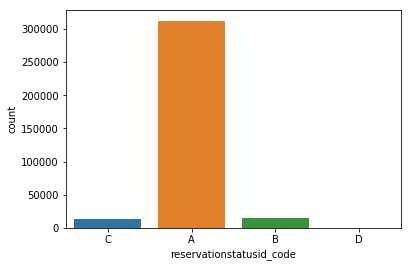

In [0]:
# reservationstatusid_code
sns.countplot(train.reservationstatusid_code)

### 2.2. Univariate Ordered Categorical

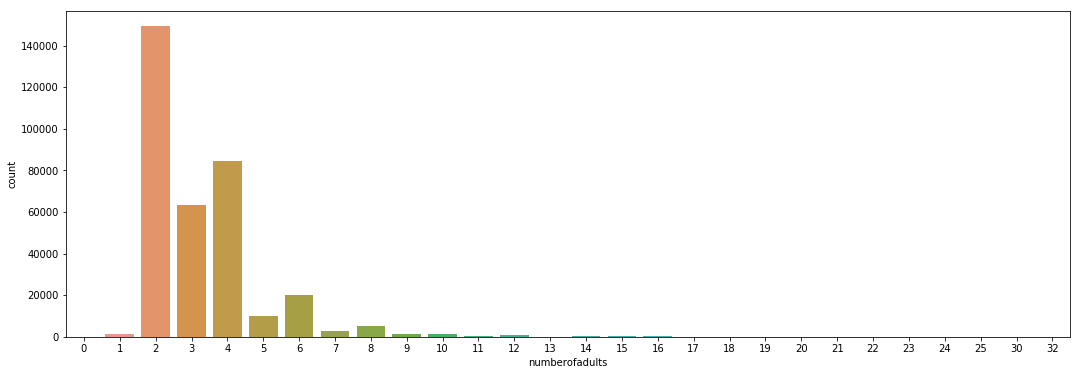

In [0]:
# numberofadults
figure = plt.figure(figsize=(18,6))
sns.countplot(train.numberofadults)

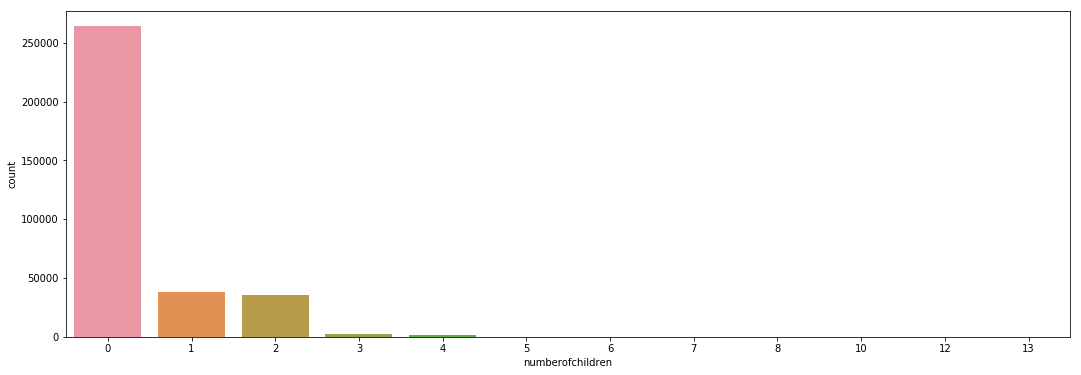

In [0]:
# numberofchildren
figure = plt.figure(figsize=(18,6))
sns.countplot(train.numberofchildren)

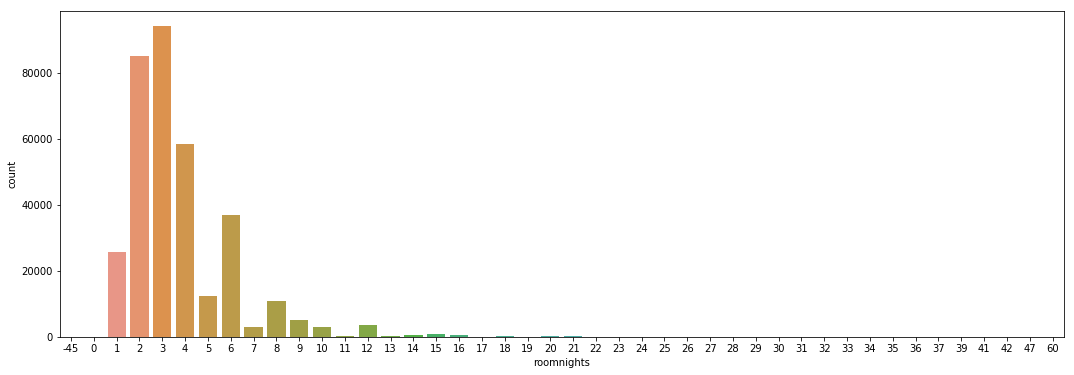

In [0]:
# roomnights
figure = plt.figure(figsize=(18,6))
sns.countplot(train.roomnights)

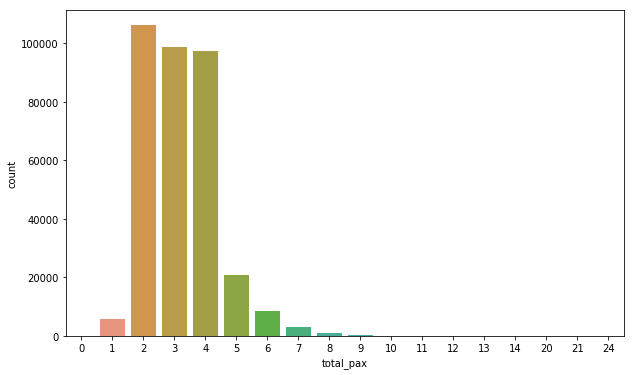

In [0]:
# total_pax
figure = plt.figure(figsize=(10,6))
sns.countplot(train.total_pax)

### 2.3. Quantitative

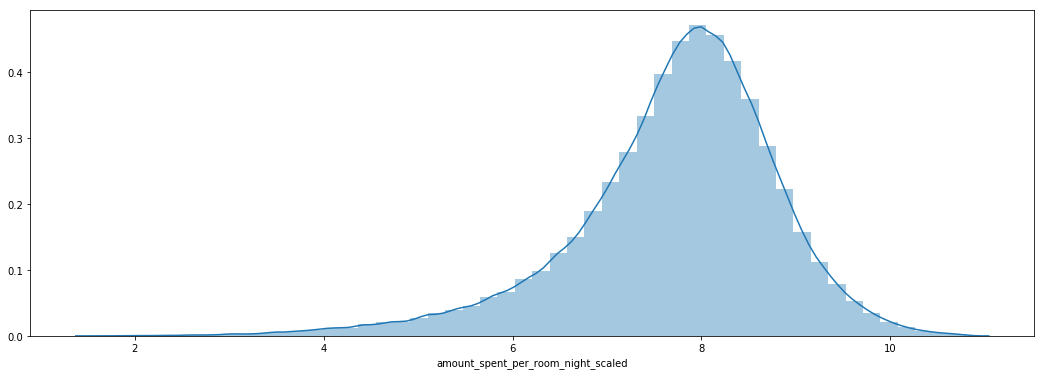

In [0]:
# amount_spent_per_room_night_scaled
figure = plt.figure(figsize=(18,6))
sns.distplot(train.amount_spent_per_room_night_scaled)

### 2.4. Bivariate

<Figure size 1440x1440 with 0 Axes>

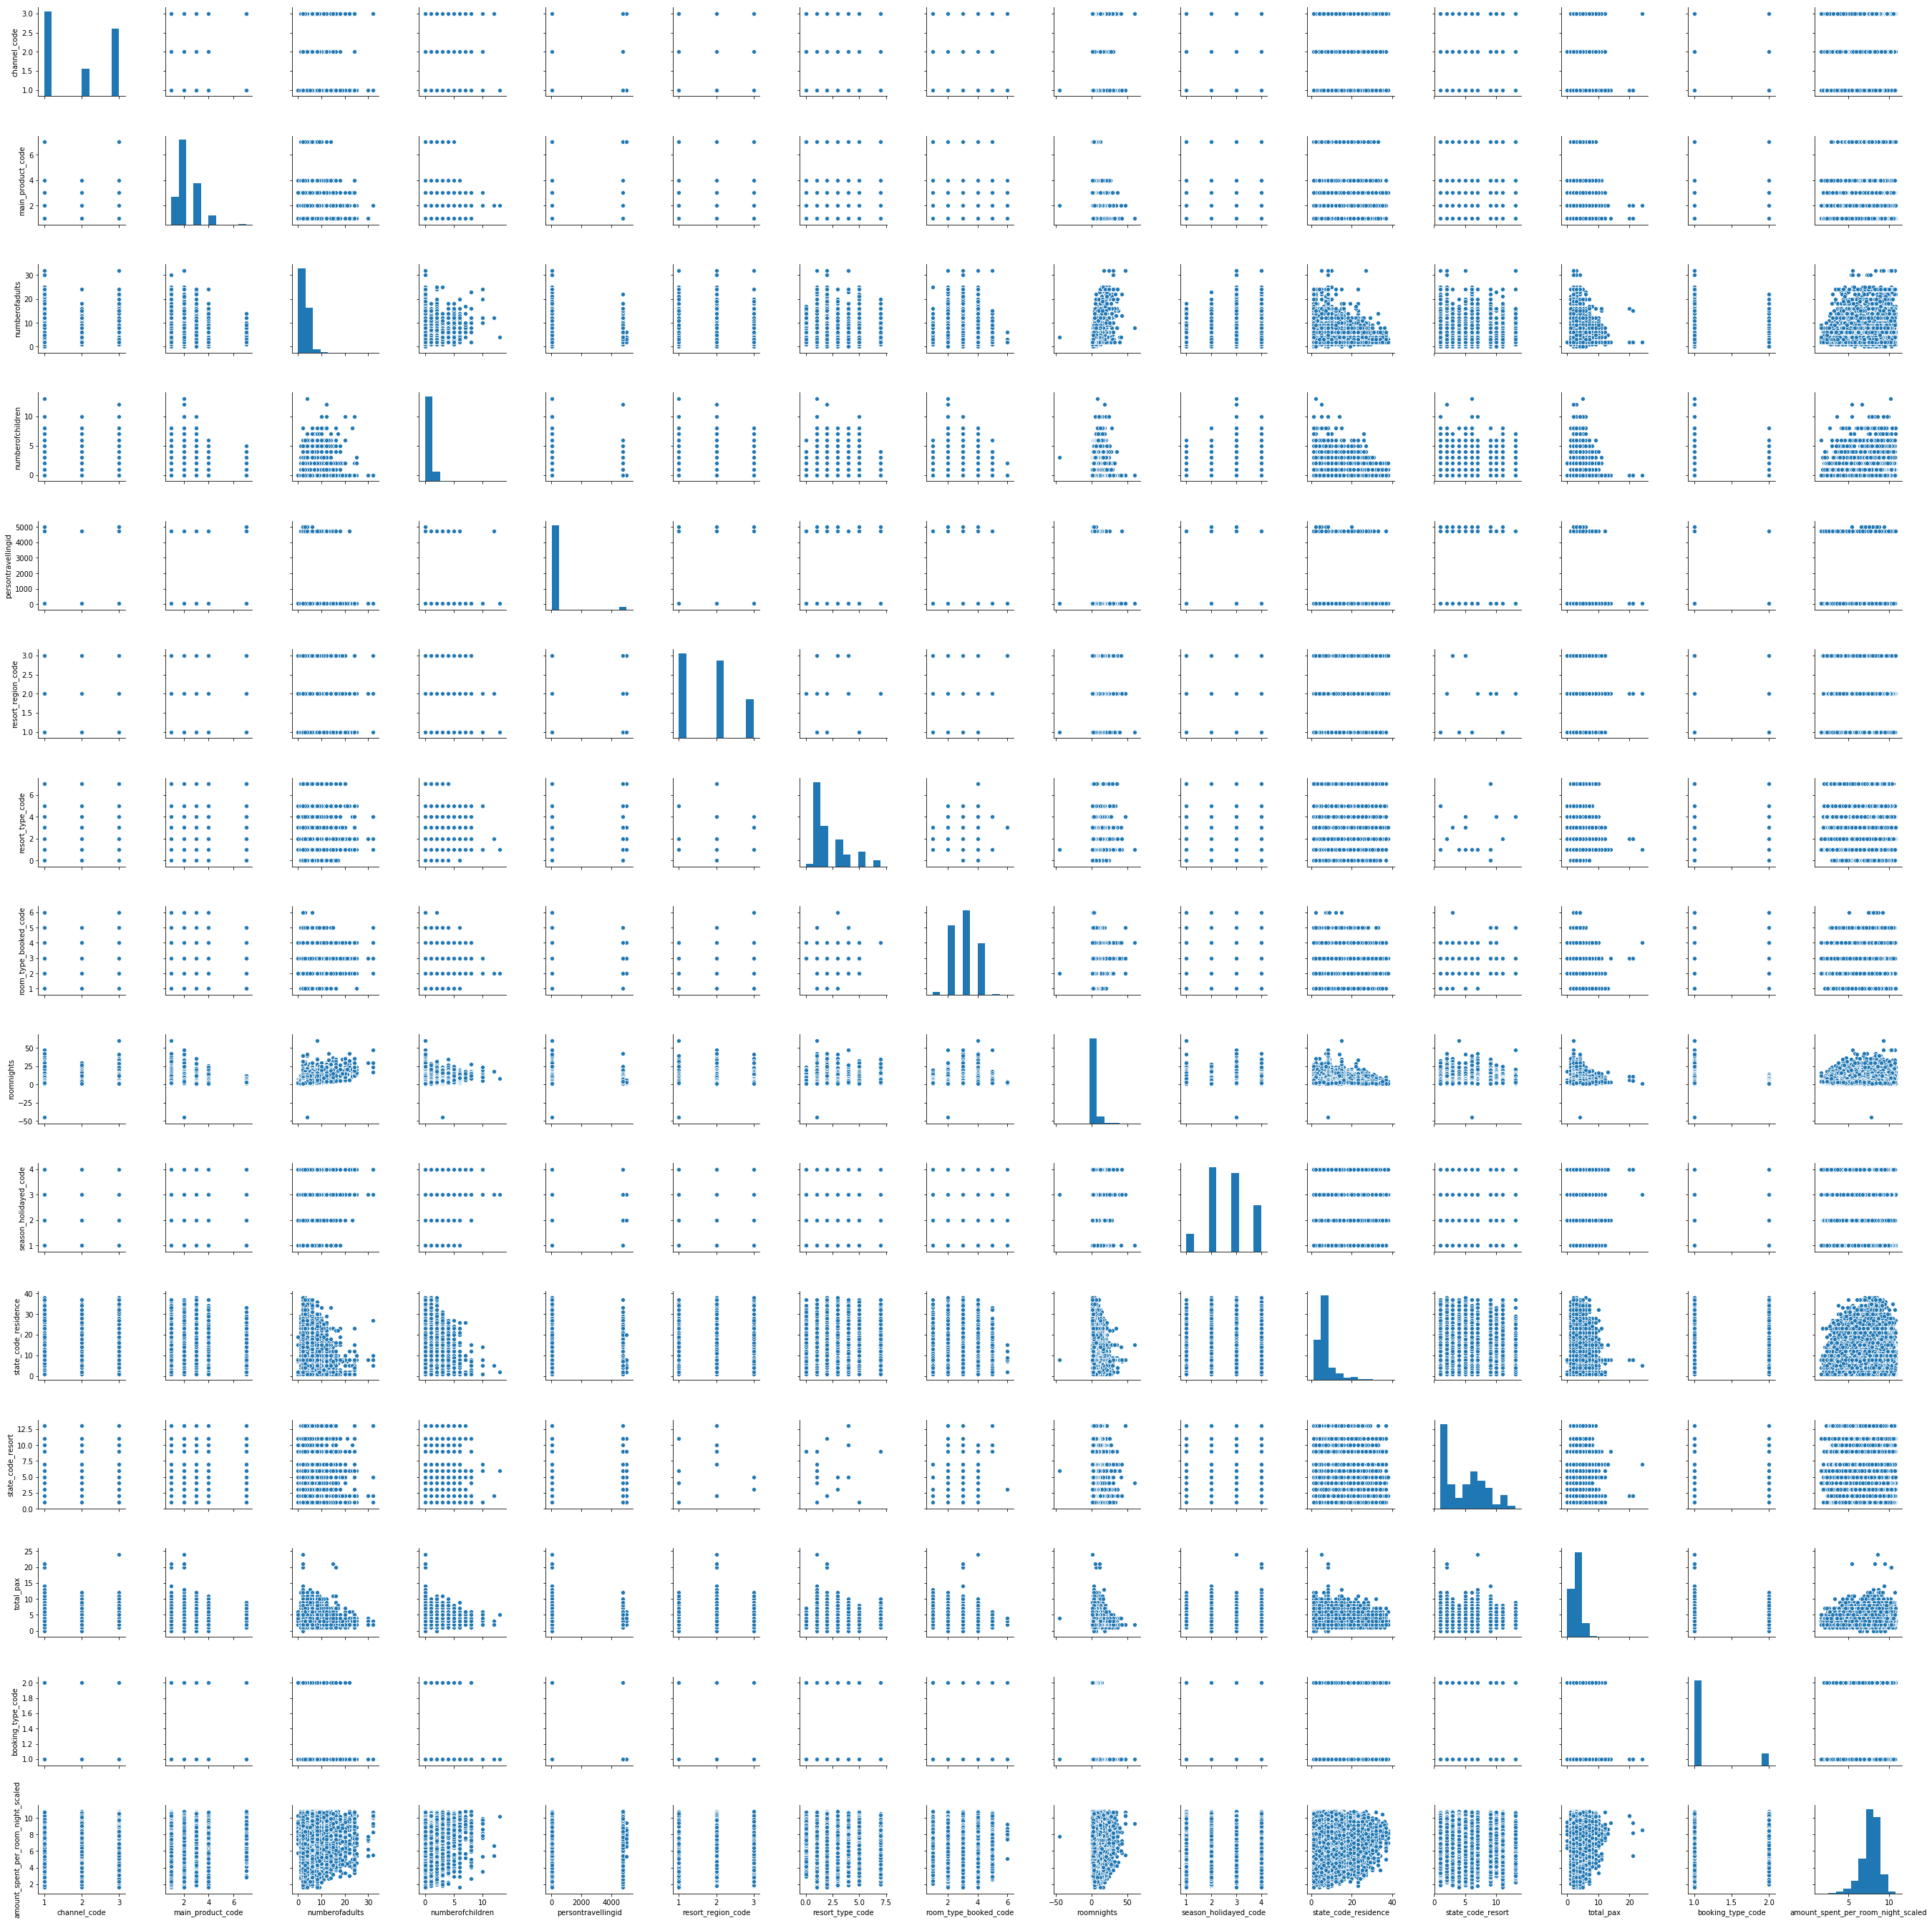

In [0]:
# Pair plot
#figure = plt.figure(figsize=(20,20))
#sns.pairplot(train)

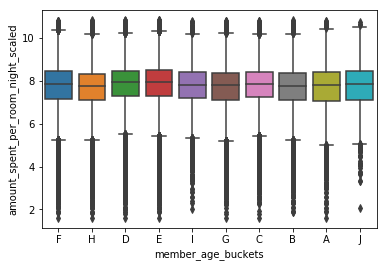

In [0]:
# member_age_buckets and amount_spent_per_room_night_scaled
sns.boxplot(x='member_age_buckets', y='amount_spent_per_room_night_scaled', data=train)

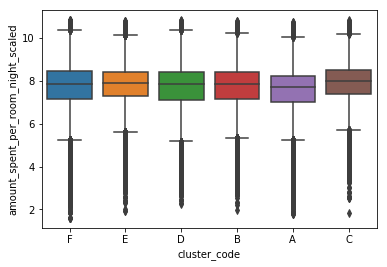

In [0]:
# cluster_code and amount_spent_per_room_night_scaled
sns.boxplot(x='cluster_code', y='amount_spent_per_room_night_scaled', data=train)

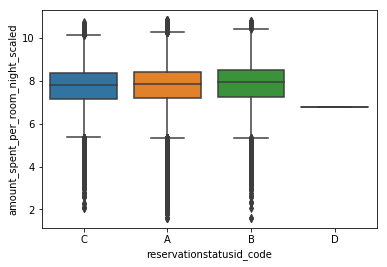

In [0]:
# reservationstatusid_code and amount_spent_per_room_night_scaled
sns.boxplot(x='reservationstatusid_code', y='amount_spent_per_room_night_scaled', data=train)

## 3. Handling missing values

In [0]:
# Train set
train.state_code_residence.fillna(8.0, inplace=True)
train.season_holidayed_code.fillna(2, inplace=True)

In [0]:
# Test set
test.state_code_residence.fillna(8.0, inplace=True)
test.season_holidayed_code.fillna(2, inplace=True)

## 4. Derived Variables

In [0]:
train.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [0]:
# Train set and test set
train['booking_date'] = pd.to_datetime(train['booking_date'], infer_datetime_format=True)
train['checkin_date'] = pd.to_datetime(train['checkin_date'], infer_datetime_format=True)
train['checkout_date'] = pd.to_datetime(train['checkout_date'], infer_datetime_format=True)

test['booking_date'] = pd.to_datetime(test['booking_date'], infer_datetime_format=True)
test['checkin_date'] = pd.to_datetime(test['checkin_date'], infer_datetime_format=True)
test['checkout_date'] = pd.to_datetime(test['checkout_date'], infer_datetime_format=True)

In [0]:
# Extract day, month, year and dayofweek of the train set
train['booking_day'] = train['booking_date'].dt.day
train['booking_month'] = train['booking_date'].dt.month
train['booking_year'] = train['booking_date'].dt.year
train['booking_dayofweek'] = train['booking_date'].dt.dayofweek

train['checking_day'] = train['checkin_date'].dt.day
train['checking_month'] = train['checkin_date'].dt.month
train['checking_year'] = train['checkin_date'].dt.year
train['checking_dayofweek'] = train['checkin_date'].dt.dayofweek

train['checkout_day'] = train['checkout_date'].dt.day
train['checkout_month'] = train['checkout_date'].dt.month
train['checkout_year'] = train['checkout_date'].dt.year
train['checkout_dayofweek'] = train['checkout_date'].dt.dayofweek

In [0]:
# Extract day, month, year and dayofweek of the test set
test['booking_day'] = test['booking_date'].dt.day
test['booking_month'] = test['booking_date'].dt.month
test['booking_year'] = test['booking_date'].dt.year
test['booking_dayofweek'] = test['booking_date'].dt.dayofweek

test['checking_day'] = test['checkin_date'].dt.day
test['checking_month'] = test['checkin_date'].dt.month
test['checking_year'] = test['checkin_date'].dt.year
test['checking_dayofweek'] = test['checkin_date'].dt.dayofweek

test['checkout_day'] = test['checkout_date'].dt.day
test['checkout_month'] = test['checkout_date'].dt.month
test['checkout_year'] = test['checkout_date'].dt.year
test['checkout_dayofweek'] = test['checkout_date'].dt.dayofweek

In [0]:
# Drop the date columns
train.drop('booking_date', axis=1, inplace=True)
train.drop('checkin_date', axis=1, inplace=True)
train.drop('checkout_date', axis=1, inplace=True)

test.drop('booking_date', axis=1, inplace=True)
test.drop('checkin_date', axis=1, inplace=True)
test.drop('checkout_date', axis=1, inplace=True)

## 5. Data Preparation

In [0]:
train.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_day,booking_month,booking_year,booking_dayofweek,checking_day,checking_month,checking_year,checking_dayofweek,checkout_day,checkout_month,checkout_year,checkout_dayofweek
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,4,5,2018,4,4,5,2018,4,4,6,2018,0
1,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,23,1,2015,4,4,11,2015,2,16,4,2015,3
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,28,1,2015,2,2,1,2015,4,2,5,2015,5
3,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,5,2,2015,3,6,11,2015,4,16,6,2015,1
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,9,2,2015,0,14,12,2015,0,19,12,2015,5


In [0]:
train.resort_id = train.resort_id.map({
    '4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce': 1,
       '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9': 2,
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790': 3,
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35': 4,
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9': 5,
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a': 6,
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9': 7,
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b': 8,
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8': 9,
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a': 10,
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8': 11,
       'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683': 12,
       '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4': 13,
       '3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c': 14,
       '9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953': 15,
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b': 16,
       'da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c': 17,
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767': 18,
       '48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc': 19,
       '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b': 20,
       '670671cd97404156226e507973f2ab8330d3022ca96e0c93bdbdb320c41adcaf': 21,
       'f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b': 22,
       'c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894': 23,
       '81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a': 24,
       'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4': 25,
       '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451': 26,
       '6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6': 27,
       'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d': 28,
       '8722616204217eddb39e7df969e0698aed8e599ba62ed2de1ce49b03ade0fede': 29,
       '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278': 30,
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a': 31,
       '98a3ab7c340e8a033e7b37b6ef9428751581760af67bbab2b9e05d4964a8874a': 32
})

test.resort_id = test.resort_id.map({
    '4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce': 1,
       '39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8f9e9a2596173f80c9': 2,
       '535fa30d7e25dd8a49f1536779734ec8286108d115da5045d77f3b4185d8f790': 3,
       'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35': 4,
       'b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d650d5dda0a9f4ce8cd9': 5,
       'ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc1c4d03d403ba4250a': 6,
       '0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1254406d80ce44e3f9': 7,
       'a68b412c4282555f15546cf6e1fc42893b7e07f271557ceb021821098dd66c1b': 8,
       '7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02fa991a34bb38d9be8': 9,
       '4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a': 10,
       '49d180ecf56132819571bf39d9b7b342522a2ac6d23c1418d3338251bfe469c8': 11,
       'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683': 12,
       '624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da576068201b6c6958ce93f4': 13,
       '3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b462bd9994537bfe15c': 14,
       '9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e5ff3827ffb3634953': 15,
       'e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027aa13515e4f3884bb6b': 16,
       'da4ea2a5506f2693eae190d9360a1f31793c98a1adade51d93533a6f520ace1c': 17,
       '9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471cfe5e4c5b4ca7f767': 18,
       '48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c111b49baf362511afc': 19,
       '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b': 20,
       '670671cd97404156226e507973f2ab8330d3022ca96e0c93bdbdb320c41adcaf': 21,
       'f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a8143301782de13da2d9202b': 22,
       'c6f3ac57944a531490cd39902d0f777715fd005efac9a30622d5f5205e7f6894': 23,
       '81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c09357e107c99ba4d6948a': 24,
       'c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf9b2ade051f0775ac4': 25,
       '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451': 26,
       '6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef07cb45ec436263c7d6': 27,
       'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d': 28,
       '8722616204217eddb39e7df969e0698aed8e599ba62ed2de1ce49b03ade0fede': 29,
       '3fdba35f04dc8c462986c992bcf875546257113072a909c162f7e470e581e278': 30,
       '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a': 31,
       '98a3ab7c340e8a033e7b37b6ef9428751581760af67bbab2b9e05d4964a8874a': 32
})

In [0]:
# Perform get dummies for Train set
temp = pd.get_dummies(train.member_age_buckets, prefix='member_age_buckets')
train = pd.concat([train, temp], axis=1)
train.drop('member_age_buckets', axis=1, inplace=True)

temp = pd.get_dummies(train.cluster_code, prefix='cluster_code')
train = pd.concat([train, temp], axis=1)
train.drop('cluster_code', axis=1, inplace=True)

temp = pd.get_dummies(train.reservationstatusid_code, prefix='reservationstatusid_code')
train = pd.concat([train, temp], axis=1)
train.drop('reservationstatusid_code', axis=1, inplace=True)

In [0]:
# Drop the redundant columns from the get_dummies
train.drop('member_age_buckets_J', axis=1, inplace=True)
train.drop('cluster_code_A', axis=1, inplace=True)
train.drop('reservationstatusid_code_D', axis=1, inplace=True)

In [0]:
# Perform get dummies for Test set
temp = pd.get_dummies(test.member_age_buckets, prefix='member_age_buckets')
test = pd.concat([test, temp], axis=1)
test.drop('member_age_buckets', axis=1, inplace=True)

temp = pd.get_dummies(test.cluster_code, prefix='cluster_code')
test = pd.concat([test, temp], axis=1)
test.drop('cluster_code', axis=1, inplace=True)

temp = pd.get_dummies(test.reservationstatusid_code, prefix='reservationstatusid_code')
test = pd.concat([test, temp], axis=1)
test.drop('reservationstatusid_code', axis=1, inplace=True)

In [0]:
# Drop the redundant columns from the get_dummies
test.drop('member_age_buckets_J', axis=1, inplace=True)
test.drop('cluster_code_A', axis=1, inplace=True)

In [0]:
# test.drop('reservationstatusid_code_D', axis=1, inplace=True)
# Cannot remove since in test set we don't have value of D for reservationstatusid_code

In [0]:
# Remove the redundant columns
train.drop('memberid', axis=1, inplace=True)
#train.drop('resort_id', axis=1, inplace=True)

test.drop('memberid', axis=1, inplace=True)
#test.drop('resort_id', axis=1, inplace=True)

### 5.1. Perform scaling

In [0]:
y = train.pop('amount_spent_per_room_night_scaled')
X = train

In [0]:
scaler = StandardScaler()

In [0]:
var = ['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'booking_day', 'booking_month',
       'booking_year', 'booking_dayofweek', 'checking_day', 'checking_month',
       'checking_year', 'checking_dayofweek', 'checkout_day', 'checkout_month',
       'checkout_year', 'checkout_dayofweek', 'resort_id']

train[var] = scaler.fit_transform(train[var])
test[var] = scaler.transform(test[var])

## 6. Modeling

### 6.1. Linear Regression

In [0]:
lm = LinearRegression()
lm.fit(X, y)

y_pred = lm.predict(test)

In [0]:
# Create the submission file
pred = pd.DataFrame(y_pred, columns=['amount_spent_per_room_night_scaled'])
submission = pd.concat([reservation_id, pred], axis=1)
submission.to_csv('submission_file.csv', index=False)

In [0]:
# Check the submission file
submission_file = pd.read_csv('submission_file.csv')
submission_file.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.627085
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.450553
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.506257
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.543542
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.663842


In [0]:
#from IPython.display import HTML

#def create_download_link(title = "Download CSV file", filename = "submission_file.csv"):  
#    html = '<a href={filename}>{title}</a>'
#    html = html.format(title=title,filename=filename)
#    return HTML(html)

# create a link to download the dataframe which was saved with .to_csv method
#create_download_link(filename='submission_file.csv')

In [0]:
# files.download('submission_file.csv')

### 6.2. Lasso

In [0]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [0]:
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

In [0]:
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True, verbose = 1, n_jobs=-1)            
model_cv.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [0]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.192790,0.190300,0.019888,0.003531,0.001,{'alpha': 0.001},-1.084967,-1.083687,-1.103110,-1.102342,-1.095992,-1.094020,0.008300,1,-1.095986,-1.096279,-1.091427,-1.091722,-1.093240,-1.093731,0.002057
1,0.811308,0.009129,0.022245,0.003128,0.01,{'alpha': 0.01},-1.092998,-1.090163,-1.109950,-1.110313,-1.103204,-1.101325,0.008398,2,-1.103363,-1.103767,-1.098949,-1.098931,-1.100603,-1.101123,0.002088
2,0.433637,0.026205,0.023411,0.009141,1,{'alpha': 1.0},-1.178918,-1.175292,-1.198453,-1.198681,-1.190336,-1.188336,0.009718,3,-1.190689,-1.191595,-1.185805,-1.185748,-1.187834,-1.188334,0.002430
3,0.465238,0.030473,0.024846,0.009657,5,{'alpha': 5.0},-1.178918,-1.175292,-1.198453,-1.198681,-1.190336,-1.188336,0.009718,3,-1.190689,-1.191595,-1.185805,-1.185748,-1.187834,-1.188334,0.002430
4,0.427935,0.051427,0.018456,0.002353,10,{'alpha': 10.0},-1.178918,-1.175292,-1.198453,-1.198681,-1.190336,-1.188336,0.009718,3,-1.190689,-1.191595,-1.185805,-1.185748,-1.187834,-1.188334,0.002430


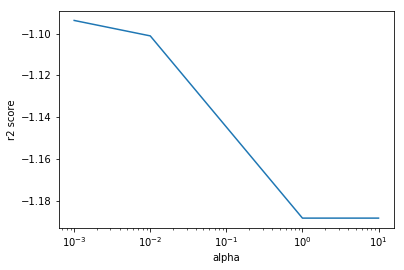

In [0]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

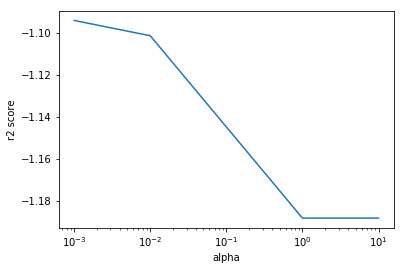

In [0]:
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [0]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X, y)

# predict
y_train_pred = lm.predict(test)

In [0]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.726),
 ('channel_code', 0.087),
 ('main_product_code', -0.076),
 ('numberofadults', 0.173),
 ('numberofchildren', 0.055),
 ('persontravellingid', -0.043),
 ('resort_region_code', -0.063),
 ('resort_type_code', 0.014),
 ('room_type_booked_code', 0.018),
 ('roomnights', -0.029),
 ('season_holidayed_code', -0.048),
 ('state_code_residence', -0.015),
 ('state_code_resort', 0.098),
 ('total_pax', 0.114),
 ('booking_type_code', 0.017),
 ('resort_id', -0.069),
 ('booking_day', 0.011),
 ('booking_month', 0.018),
 ('booking_year', 0.14),
 ('booking_dayofweek', 0.002),
 ('checking_day', 0.009),
 ('checking_month', 0.017),
 ('checking_year', -0.044),
 ('checking_dayofweek', 0.015),
 ('checkout_day', -0.008),
 ('checkout_month', -0.005),
 ('checkout_year', 0.0),
 ('checkout_dayofweek', 0.009),
 ('member_age_buckets_A', -0.0),
 ('member_age_buckets_B', -0.002),
 ('member_age_buckets_C', 0.016),
 ('member_age_buckets_D', 0.027),
 ('member_age_buckets_E', 0.036),
 ('member_age_buckets

In [0]:
# Create the submission file
pred = pd.DataFrame(y_train_pred, columns=['amount_spent_per_room_night_scaled'])
submission = pd.concat([reservation_id, pred], axis=1)
submission.to_csv('submission_file.csv', index=False)

# Check the submission file
submission_file = pd.read_csv('submission_file.csv')
submission_file.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.686690
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.424527
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.580033
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.559890
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.632679


In [0]:
files.download('submission_file.csv')

### 6.3. Random Forrest

In [0]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

In [0]:
model = RandomForestRegressor()

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': [200],
               'max_features': ['sqrt'],
               'max_depth': [10],
               'min_samples_split': [10],
               'min_samples_leaf': [4],
               'bootstrap': [True]}
pprint(random_grid)

{'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'min_samples_leaf': [4],
 'min_samples_split': [10],
 'n_estimators': [200]}


In [0]:
rf_random = GridSearchCV(estimator = model, param_grid = random_grid,
                         cv = folds, verbose=1, 
                         return_train_score=True, 
                         scoring= 'neg_mean_squared_error', n_jobs = -1)

In [0]:
rf_random.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200], 'max_features': ['sqrt'], 'max_depth': [10], 'min_samples_split': [10], 'min_samples_leaf': [4], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [0]:
best_random = rf_random.best_estimator_

In [0]:
y_predicted = best_random.predict(test)

In [0]:
# Create the submission file
pred = pd.DataFrame(y_predicted, columns=['amount_spent_per_room_night_scaled'])
submission = pd.concat([reservation_id, pred], axis=1)
submission.to_csv('submission_file.csv', index=False)

# Check the submission file
submission_file = pd.read_csv('submission_file.csv')
submission_file.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,7.879380
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.662699
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.743200
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.837873
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.829797


In [0]:
files.download('submission_file.csv')

### 6.4. Lightgbm

In [0]:
import lightgbm as lgbm

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [0]:
d_train = lgbm.Dataset(x_train, label=y_train)
d_valid = lgbm.Dataset(x_test, label=y_test)
watchlist = [d_valid]

In [0]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': -1,
    'reg_alpha': 5,
    'reg_lambda': 2,
    'num_leaves' : 250,
    'max_bin': 150,
    
    'colsample_bytree' : 0.9234,
          
    'min_child_samples': 399, 
          'min_child_weight': 0.1,
          
          'subsample': 0.855,
          
          'num_threads' : 9
}
n_estimators = 500

In [0]:
model = lgbm.train(params, d_train, n_estimators, watchlist, verbose_eval=1, early_stopping_rounds=100)

[1]	valid_0's rmse: 1.08331
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's rmse: 1.07674
[3]	valid_0's rmse: 1.07114
[4]	valid_0's rmse: 1.0664
[5]	valid_0's rmse: 1.06228
[6]	valid_0's rmse: 1.05879
[7]	valid_0's rmse: 1.05568
[8]	valid_0's rmse: 1.05282
[9]	valid_0's rmse: 1.05048
[10]	valid_0's rmse: 1.04815
[11]	valid_0's rmse: 1.04601
[12]	valid_0's rmse: 1.04409
[13]	valid_0's rmse: 1.0424
[14]	valid_0's rmse: 1.04068
[15]	valid_0's rmse: 1.03905
[16]	valid_0's rmse: 1.03796
[17]	valid_0's rmse: 1.03674
[18]	valid_0's rmse: 1.03546
[19]	valid_0's rmse: 1.03453
[20]	valid_0's rmse: 1.03339
[21]	valid_0's rmse: 1.03261
[22]	valid_0's rmse: 1.03184
[23]	valid_0's rmse: 1.03087
[24]	valid_0's rmse: 1.03026
[25]	valid_0's rmse: 1.02942
[26]	valid_0's rmse: 1.02875
[27]	valid_0's rmse: 1.02817
[28]	valid_0's rmse: 1.02774
[29]	valid_0's rmse: 1.02724
[30]	valid_0's rmse: 1.02651
[31]	valid_0's rmse: 1.02582
[32]	valid_0's rmse: 1.02529
[33]	valid_0's rmse:

In [0]:
preds = model.predict(test)

In [0]:
# Create the submission file
pred = pd.DataFrame(preds, columns=['amount_spent_per_room_night_scaled'])
submission = pd.concat([reservation_id, pred], axis=1)
submission.to_csv('submission_file.csv', index=False)

# Check the submission file
submission_file = pd.read_csv('submission_file.csv')
submission_file.head()

,reservation_id,amount_spent_per_room_night_scaled
0,7dae1ce6bc8f69481328f2be5c4943077dad5598b5f66d...,8.015817
1,fe0d4e444e1818436c88f72f1cf800536c2f785e59baeb...,7.476248
2,540bd4285ad8168e8388f84ee74a82cd4f97dc0a404d3e...,7.624360
3,09593c907ae262e46f655b4db9e14f54a19eadcfdd2679...,7.826251
4,f4c50caac68051faf37551d70bb17eebef2a20e2244cb1...,7.624228


In [0]:
files.download('submission_file.csv')